In [1]:
import csv
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report, confusion_matrix 
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('testset.csv') 
print("Rows and Columns\n") 
print(dataset.shape)

Rows and Columns

(100990, 11)


In [3]:
dataset.dropna(inplace=True)

###### TEMPRATURE OUTLIERS



The plot of temperature variation with outliers




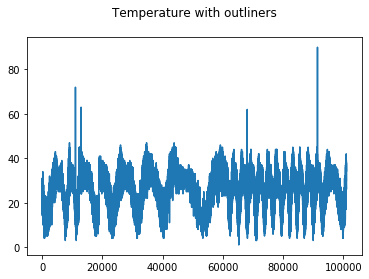

In [4]:
print("\n\nThe plot of temperature variation with outliers\n\n") 
plt.plot(dataset['_tempm'])
plt.title('Temperature with outliners\n') 
plt.show()

In [5]:
print("\nRemoving the tuple with more than 1.5*(75%ile Quartile) value of temp\n")
w=dataset['_tempm'].quantile(.75)*(1.5) 
print(w," is the 1.5*75%ile\n")


Removing the tuple with more than 1.5*(75%ile Quartile) value of temp

48.0  is the 1.5*75%ile




 Below is the plot after removing outliners



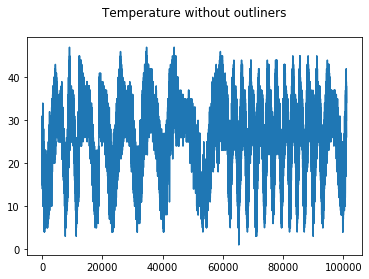

In [6]:
print("\n Below is the plot after removing outliners\n") 
dataset = dataset[dataset['_tempm'] < w]
plt.plot(dataset['_tempm']) 
plt.title('Temperature without outliners\n') 
plt.show()

###### PRESSURE OUTLIERS



The plot of pressure variation with outliers




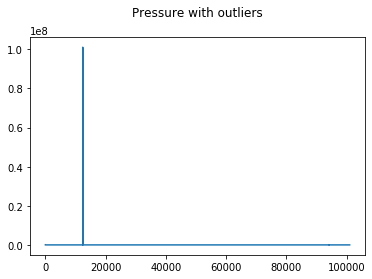

In [7]:
print("\n\nThe plot of pressure variation with outliers\n\n") 
plt.plot(dataset['_pressurem'])
plt.title('Pressure with outliers\n') 
plt.show()

In [8]:
print("\nRemoving the tuple with more than 1030 and less than 980 value of pressure\n")
w=1030


Removing the tuple with more than 1030 and less than 980 value of pressure




 Below is the plot after removing outliners



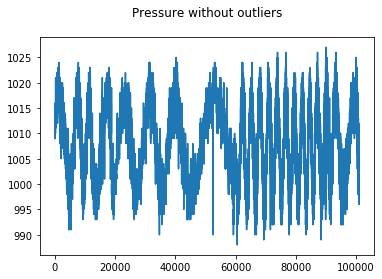

In [9]:
print("\n Below is the plot after removing outliners\n") 
dataset = dataset[dataset['_pressurem'] < w]
dataset = dataset[dataset['_pressurem'] >980]
plt.plot(dataset['_pressurem']) 
plt.title('Pressure without outliers\n') 
plt.show()

###### HUMIDITY OUTLIERS



The plot of humidty variation with outliers




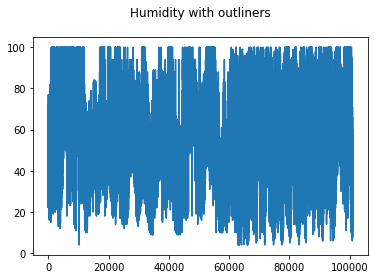

In [10]:
print("\n\nThe plot of humidty variation with outliers\n\n") 
plt.plot(dataset['_hum'])
plt.title('Humidity with outliners\n') 
plt.show()

In [11]:
print("\nRemoving the tuple with more than 1.5*(75%ile) of humidity values\n")
w=dataset['_hum'].quantile(.75)*(1.5)


Removing the tuple with more than 1.5*(75%ile) of humidity values




 below is the plot after removing outliners



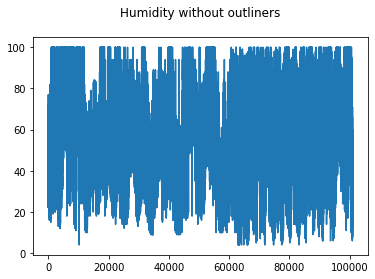

In [12]:
print("\n below is the plot after removing outliners\n") 
dataset = dataset[dataset['_hum'] < w]
plt.plot(dataset['_hum']) 
plt.title('Humidity without outliners\n') 
plt.show()

In [13]:
print("\n\nanalysis of the first 5 datapoints\n") 
print(dataset.head())
print("\nThe target attributes\n") 
for i in dataset['_conds'].unique(): 
    print(i)



analysis of the first 5 datapoints

  _conds  _dewptm  _fog  _hail  _hum  _pressurem  _rain  _snow  _tempm  \
0  Smoke      9.0     0      0  27.0      1010.0      0      0    30.0   
3  Smoke     10.0     0      0  41.0      1010.0      0      0    24.0   
4  Smoke     11.0     0      0  47.0      1011.0      0      0    23.0   
5  Smoke     12.0     0      0  56.0      1011.0      0      0    21.0   
6  Smoke     13.0     0      0  60.0      1010.0      0      0    21.0   

   _thunder  _tornado  
0         0         0  
3         0         0  
4         0         0  
5         0         0  
6         0         0  

The target attributes

Smoke
Clear
Haze
Unknown
Scattered Clouds
Shallow Fog
Mostly Cloudy
Fog
Partly Cloudy
Patches of Fog
Thunderstorms and Rain
Overcast
Rain
Light Rain
Light Drizzle
Drizzle
Mist
Thunderstorm
Light Thunderstorms and Rain
Light Thunderstorm
Squalls
Heavy Rain
Light Haze
Widespread Dust
Funnel Cloud
Heavy Thunderstorms and Rain
Heavy Thunderstorms with

In [14]:
x=dataset.drop('_conds',axis=1).values
y=dataset['_conds'].values

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

## CLASSIFICATION USING DECISION TREE CLASSIFIER

In [16]:
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train) 
y_pred = classifier.predict(x_test)

In [17]:
print(confusion_matrix(y_test, y_pred)) 

[[  8   0   0 ...   0   0  14]
 [  1 194   0 ...   0   2  13]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   2   0   0]
 [  0   9   0 ...   0   6   2]
 [ 20  20   0 ...   0   3 151]]


In [25]:
print(classification_report(y_test, y_pred))

C:\Users\yashk\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yashk\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


                               precision    recall  f1-score   support

                 Blowing Sand       0.07      0.11      0.09        75
                        Clear       0.29      0.31      0.30       627
                      Drizzle       0.00      0.00      0.00        20
                          Fog       0.71      0.78      0.74       536
                 Funnel Cloud       0.00      0.00      0.00         1
                         Haze       0.70      0.78      0.73      9419
                    Heavy Fog       0.23      0.21      0.22        92
                   Heavy Rain       0.14      0.33      0.20         3
 Heavy Thunderstorms and Rain       0.00      0.00      0.00         8
Heavy Thunderstorms with Hail       0.00      0.00      0.00         1
                Light Drizzle       0.15      0.10      0.12        77
                    Light Fog       0.07      0.08      0.08        12
           Light Hail Showers       0.00      0.00      0.00         1
     

In [19]:
print(classifier.predict([[9,0,0,27,1010,0,0,30,0,0]]))
print(classifier.predict([[0,0,0,60,1020,0,0,30,1,0]]))
print(classifier.predict([[1,1,1,60,1020,1,1,40,1,1]]))
print(classifier.predict([[1,1,1,1,1000,1,1,40,1,1]]))

['Haze']
['Smoke']
['Fog']
['Thunderstorms and Rain']


## CLASSIFICATION USING NAIVE BAYES ALGORITHM

In [20]:
from sklearn.naive_bayes import GaussianNB
classifierN=GaussianNB()
classifierN.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [21]:
y_predN = classifierN.predict(x_test)

In [22]:
print(confusion_matrix(y_test, y_predN)) 

[[  0   0   0 ...   0   0  30]
 [  0   0   0 ...   0   0 154]
 [  0   0   0 ...   0   0   1]
 ...
 [  0   0   0 ...   0   0  16]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0 201]]


In [23]:
print(classification_report(y_test, y_predN))

C:\Users\yashk\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\yashk\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


                               precision    recall  f1-score   support

                 Blowing Sand       0.00      0.00      0.00        75
                        Clear       0.00      0.00      0.00       627
                      Drizzle       0.00      0.00      0.00        20
                          Fog       0.49      0.81      0.61       536
                 Funnel Cloud       0.00      0.00      0.00         1
                         Haze       0.71      0.75      0.73      9419
                    Heavy Fog       0.00      0.00      0.00        92
                   Heavy Rain       0.00      0.00      0.00         3
 Heavy Thunderstorms and Rain       0.00      0.00      0.00         8
Heavy Thunderstorms with Hail       0.00      0.00      0.00         1
                Light Drizzle       0.00      0.00      0.00        77
                    Light Fog       0.00      0.00      0.00        12
           Light Hail Showers       0.00      0.00      0.00         1
     

In [24]:
print(classifierN.predict([[9,0,0,27,1010,0,0,30,0,0]]))
print(classifierN.predict([[0,0,0,60,1020,0,0,30,1,0]]))
print(classifierN.predict([[1,1,1,60,1020,1,1,40,1,1]]))
print(classifierN.predict([[1,1,1,1,1000,1,1,40,1,1]]))

['Haze']
['Thunderstorm']
['Light Thunderstorms and Rain']
['Thunderstorms and Rain']
